# Shopping Data

Segment Shopping Customers

Problem Statement: Understand the Target Customers for the marketing team to plan a strategy

Context: Your boss wants you to identify the most important shopping groups based on income, age, 
and the mall shopping score.

They want the ideal number of groups with a label for each.

The Approach:
1. Perform some quick exploratory Data analysis
2. Use KMEANS clustering Algorithm to create our segments.
3. Use Summary Statistics on the clusters
4. Visualize

Lets import our libraries for analysis

In [1]:
import pandas as pd # data manipulation 
import matplotlib.pyplot as plt # data viz
import seaborn as sb # data viz
from sklearn.cluster import KMeans # clustering for machine learning

import warnings
warnings.filterwarnings('ignore')

Lets read the data from the csv and store it in a variable (DF)

In [2]:
df = pd.read_csv("C:/Users/aeali/Documents/Shopping Data Portfolio 2/Python---Portfolio-Project-2/Mall_Customers.csv")

Lets take a look at some of the data from the table

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate analysis (one variable)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Based on the above table, we can see the average income is roughly 60.6k a year and that the median income is 61k. This distribution may be a bit of a normal distribution based on the values being similar.

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

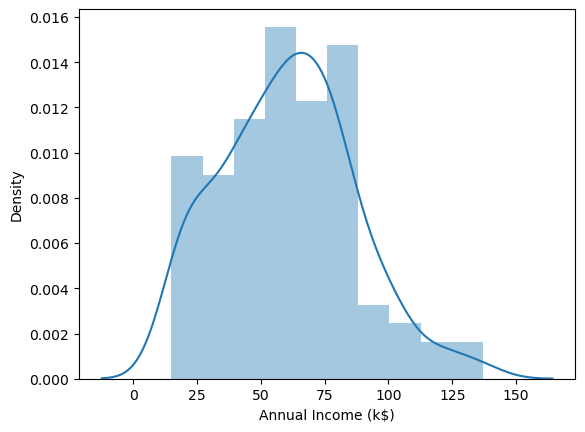

In [5]:
sb.distplot(df['Annual Income (k$)'])

We can see the distribution is close to a normal distibution.


Lets create similar graphs with age, income, and spending score.

In [6]:
str(df.columns); # create a list of table columns

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

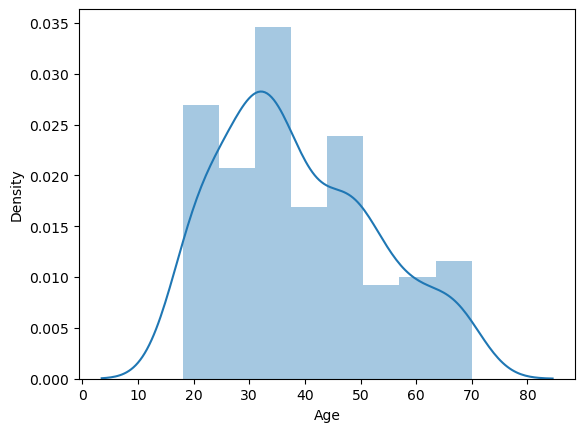

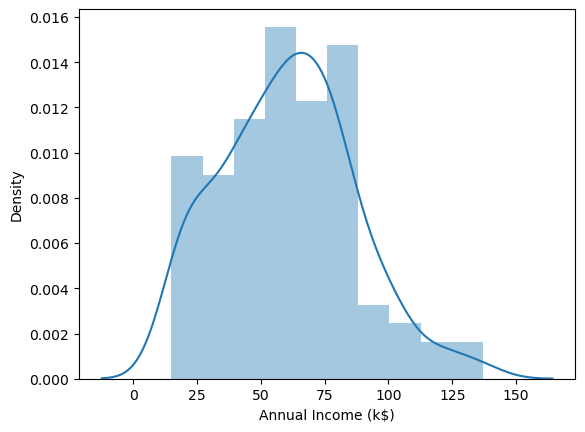

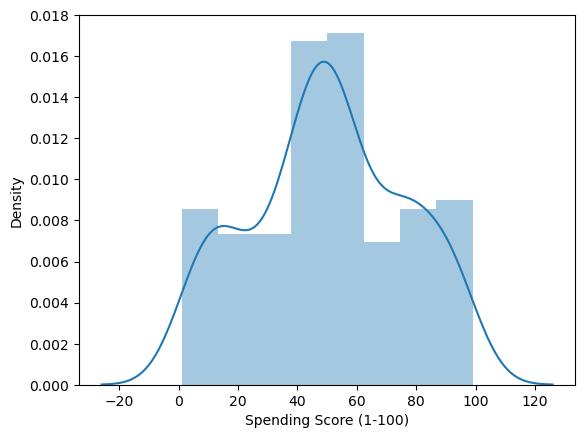

In [8]:
for i in columns:
    plt.figure() # create a new figure for each visual instead of stacking them
    sb.distplot(df[i]) # create a new visual histogram

Lets create the same type of graphs as before, but as KDE plots. A KDE Plot is a way to show how many things you have of different magnitudes through the use of curves.

We can also kplot the Annual income and shade based on Gender.

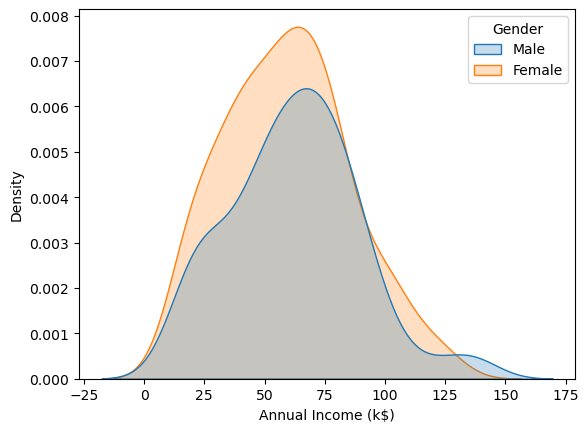

In [9]:
sb.kdeplot(shade=True,x=df['Annual Income (k$)'],hue=df['Gender']);

We can see that there are more female shoppers closer to mean income compared to men. We can also see a slight tail for male shoppers skewing to the right of the plot. This may mean there is an outlier male with a significantly higher income than the rest of the shoppers.

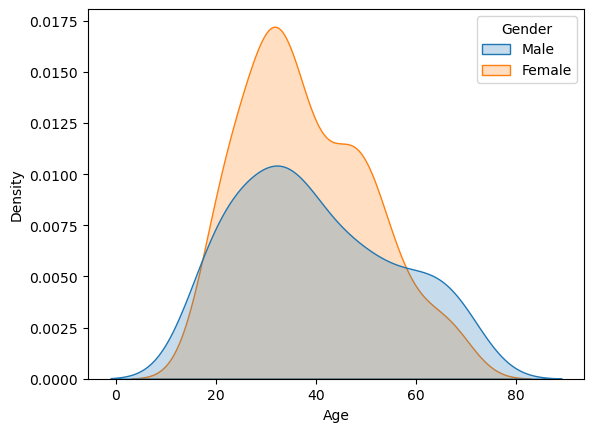

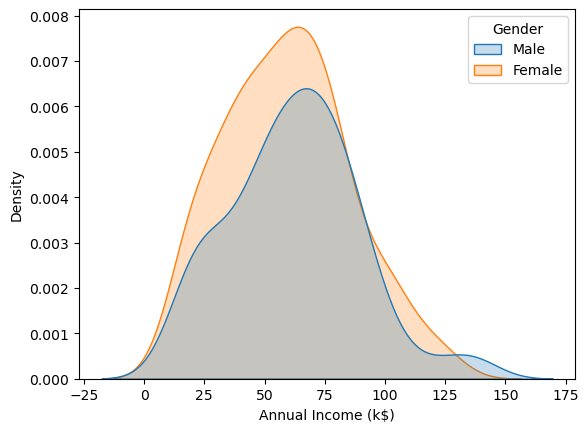

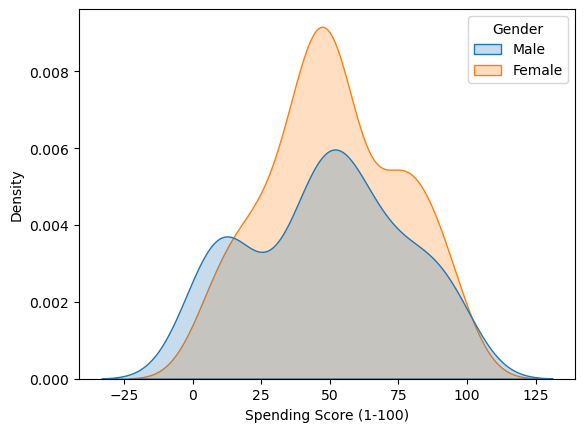

In [10]:
for i in columns:
    plt.figure()
    sb.kdeplot(shade=True,x=df[i],hue=df['Gender']);

We can that a majority of customers are females mid 20s to mid 40s. Annual income is also higher for this range as well as spending score.

Below are some box plots of the data.

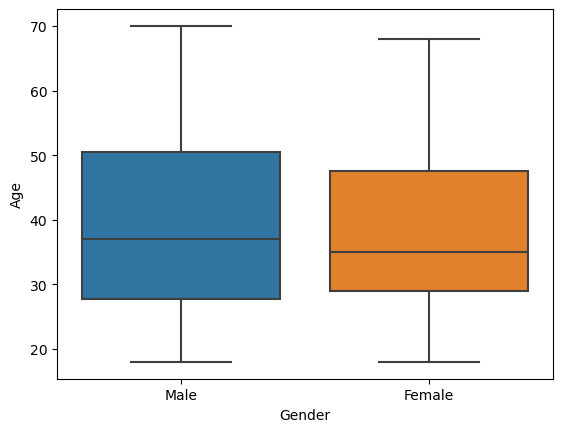

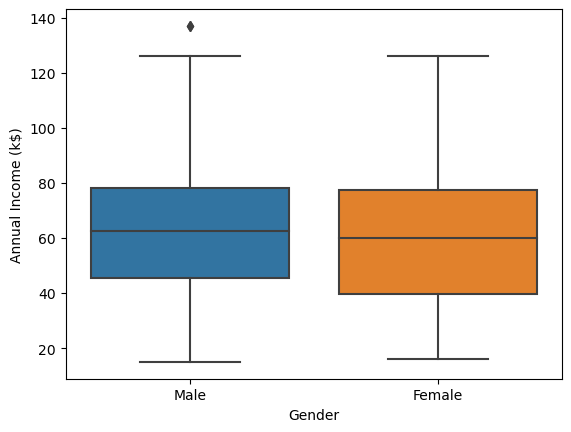

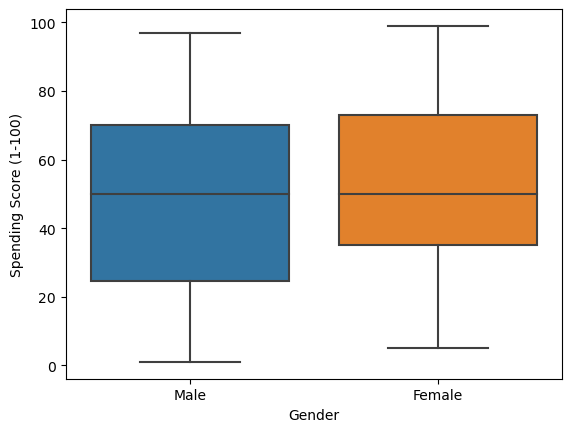

In [11]:
for i in columns:
    plt.figure()
    sb.boxplot(data=df,x='Gender',y=df[i])

We can see that the box plot for age VS gender, the median age for a male shopper is higher and there is a wider range of male shoppers age vs their female counter parts. In the second chart, we can see that there is a male outlier which caused a tail increase in the KDE plot for annual income.

In [12]:
df['Gender'].value_counts() # count of male and female
df['Gender'].value_counts(normalize = True) #Percent of Male to female

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis (Two variables)

Scatter plots

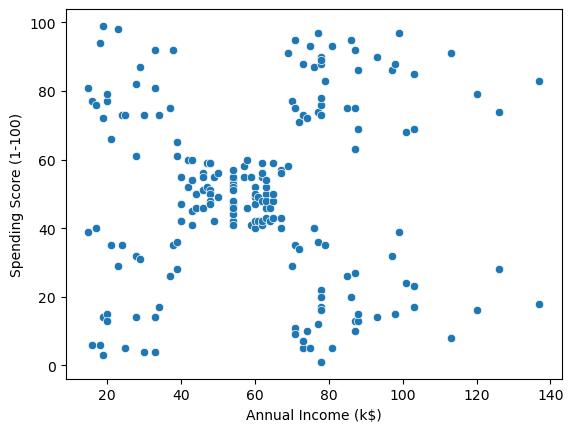

In [13]:
sb.scatterplot(data= df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)');

We can see some bivariate clustering meaning there are sections on the graph where there is a grouping of data points.

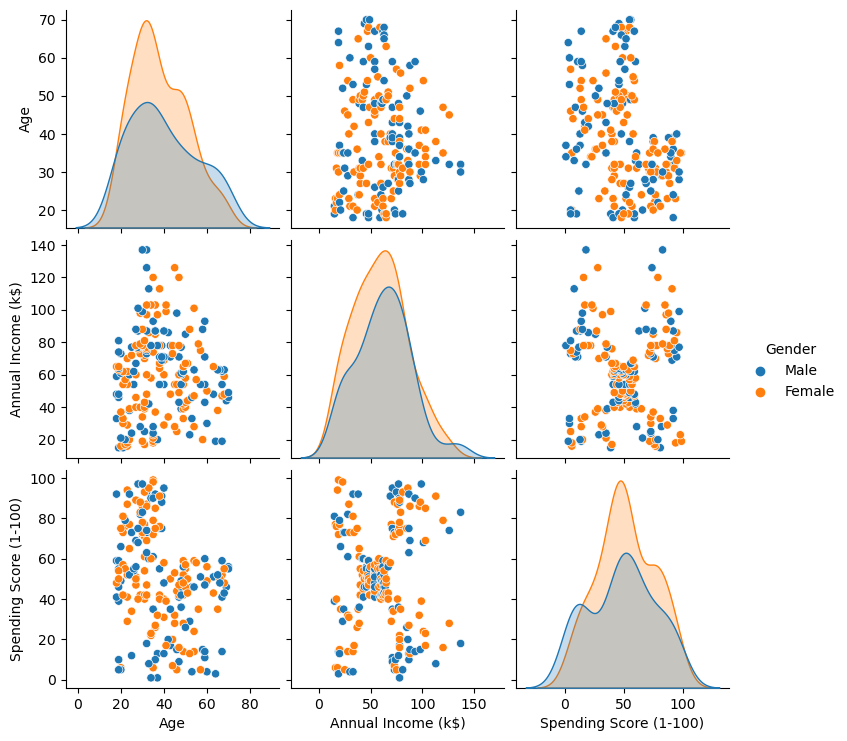

In [14]:
# Pair plot (Shows multiple different plots)
df = df.drop('CustomerID', axis = 1) # Drop CustomerID on column level
sb.pairplot(data = df, hue = 'Gender')

In [15]:
# Mean values
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df.corr() # correlation

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

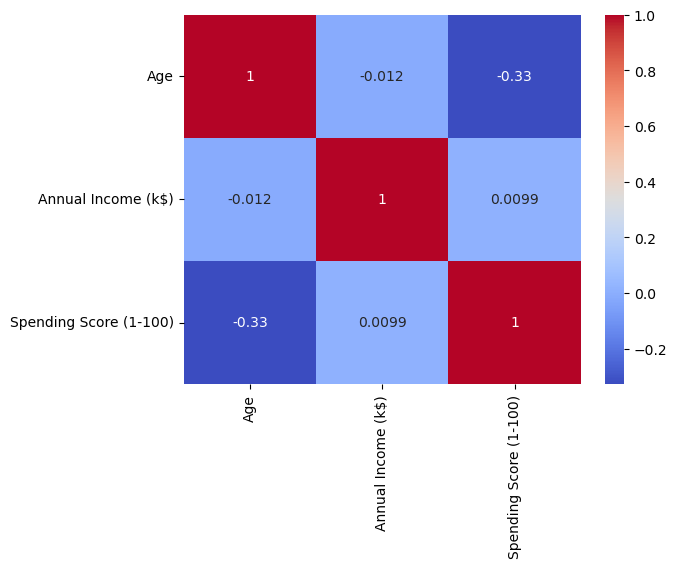

In [17]:
sb.heatmap(df.corr(),annot = True,cmap='coolwarm')

There is no large correlation between the columns. We can see that as age increases, there is a decrease in income for shoppers as well as a slight decrease in spending score. We can see little to no corelation between annual income and spending score.

# Kmeans clustering Univariate, Bivariate, Multivariate

## Univariate Clustering

Initiate, fit data to algorithm, predict

In [18]:
#initiate
clustering1 = KMeans(n_clusters=3) # change from 6 -> 8 clusters

In [19]:
clustering1.fit(df[['Annual Income (k$)']]) #fit fata frame into algorithm

KMeans(n_clusters=3)

In [20]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [21]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [22]:
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [23]:
clustering1.inertia_ 

23517.330930930937

Inertia represent distance from centroids. Lower number is better.

In [24]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [25]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3941.4163614163617,
 2862.250427350428,
 2176.280952380953,
 1734.167748917749]

Using the elbow method, the elbow starts around the x=3. We can try 3 clusters for the best clustering of our data.

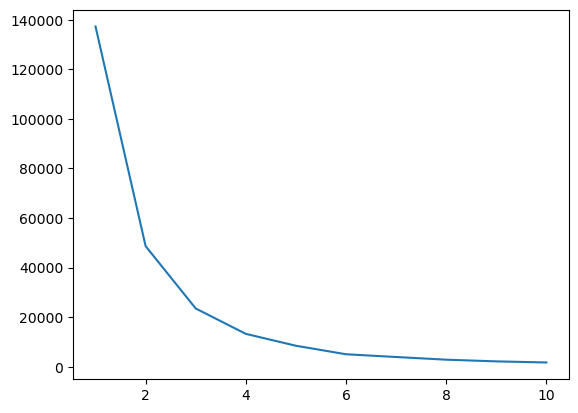

In [26]:
plt.plot(range(1,11),inertia_scores);

With the clusters, we can check the mean values via a groupby.

In [27]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [28]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


We can use this and confirm our original finding of the correlation between age and income, as shoppers age increased, their income decreased.

## Bivariate Clustering

In [29]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,3
2,Female,20,16,6,1,1
3,Female,23,16,77,1,3
4,Female,31,17,40,1,1


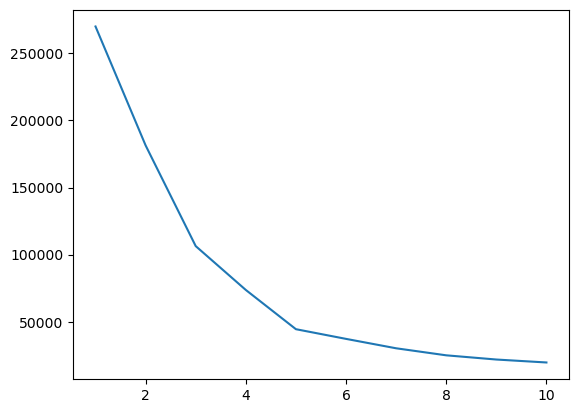

In [30]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
    
plt.plot(range(1,11),inertia_scores2);

In [31]:
#create a dataframe for the cluster centers
centers = pd.DataFrame(clustering2.cluster_centers_) 

#Change column names
centers.columns = ['x','y']

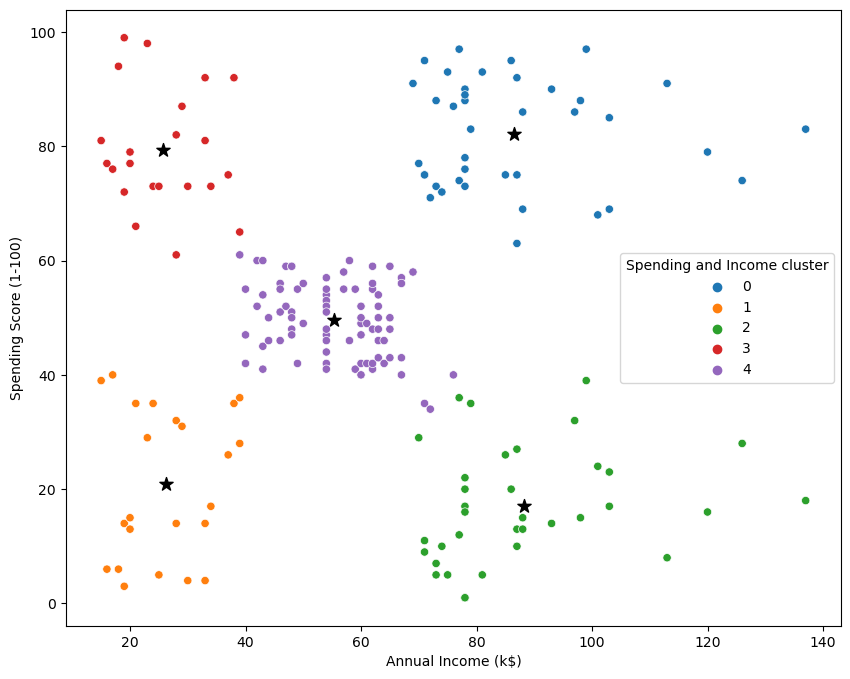

In [41]:
plt.figure(figsize=(10,8)) #adjust the size of plot
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*') # Plot center points, s = size, c=color
sb.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income cluster',palette='tab10')
# plt.savefig('Clustering_Bivariate.png') Save png

In [35]:
pd.crosstab(df['Spending and Income cluster'],df['Gender'],normalize=
           
           'index')

Gender,Female,Male
Spending and Income cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.457143,0.542857
3,0.590909,0.409091
4,0.592593,0.407407


The top right most cluster is the one we are looking to target as those individuals are spending the most amount of money with the highest income.In this senario, the group consists of 53% Female, 46% male.

In [40]:
df.groupby('Spending and Income cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()
# Mean values of clusters

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519


We can also see that the cluster with an average age of 32 has a an average income of 86k and a high spending score of 82, compared to the group whose median age is 41 with a higher income, but lower average spending score.

We should target and market to the above set of customers whom are around mid 30s who tend to have higher income and higher spending score. 